In [66]:
import pandas as pd

In [183]:
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [184]:
# 'Bream', 'Smelt' 만 사용
cond = df['Species'].isin(['Bream', 'Smelt'])

# Weight+Length2 데이터만 사용
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_target = df.loc[cond, ['Species']]

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
train_test_split(fish_data, fish_target)
# 대괄호로 시작
# Length2  Weight 데이터가 정렬되지 않은 상태로 2불류로 나뉘어 나옴
# 이건 학습할떄 사용되는 데이터와 테스트 데이터임
# 우리가 만들어준 데이터를 4가지로 분류시켜줌
# 트레인 인풋과 데스트 인풋, 트레인 타셋과 데이트 타겟

[     Length2  Weight
 26      35.0   720.0
 147     10.6     7.0
 6       29.7   500.0
 17      33.0   700.0
 25      35.0   725.0
 0       25.4   242.0
 148     11.0     9.7
 30      38.5   920.0
 157     14.3    19.7
 156     13.0    12.2
 10      31.0   475.0
 31      38.5   955.0
 24      35.0   700.0
 21      34.0   685.0
 20      34.0   575.0
 33      41.0   975.0
 9       30.7   500.0
 27      36.0   714.0
 23      35.0   680.0
 154     12.2    12.2
 153     12.0     9.8
 22      34.5   620.0
 146     10.5     7.5
 2       26.5   340.0
 1       26.3   290.0
 18      33.5   610.0
 158     15.0    19.9
 19      33.5   650.0
 34      41.0   950.0
 12      31.5   500.0
 145      9.8     6.7
 28      36.0   850.0
 5       29.7   450.0
 4       29.0   430.0
 152     11.8     9.9
 149     11.2     9.8,
      Length2  Weight
 32      39.5   925.0
 151     11.8    10.0
 13      32.0   340.0
 15      32.0   600.0
 150     11.3     8.7
 7       30.0   390.0
 14      32.0   600.0
 8       

In [187]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)
# stratify = fish_target 는 Bream과 Smelt 물고기 수가 다르기 떄문에
# 트레인 타겟 데이터로 나눌때 비율에 맞춰 나눠달라는 코드

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
kn = KNeighborsClassifier()

In [190]:
kn.fit(train_input, train_target['Species'])
# train_target 데이터를 바꿔달라고 하고있음.
# 데이터 프레임에서 데이터만 사용하기위해 대괄호로 지정해줌.
# 판다스는 2차원 데이터 프레임이라
# 이것을 일차원으로 바꿔주기 위해 Species 변수의 값만 따로 빼오는 작업을 해준거임

KNeighborsClassifier()

In [191]:
kn.score(test_input, test_target)

1.0

In [192]:
kn.predict([[25, 150]])
# 데이터 형태를 맞추기 위해 [[]] 해줌
# [
# [25, 150],
# [x1, y1],
# ...,
# [xn, yn]
# ] 형태로 만들어 주기 위해 [[]] 해줌
# 붉은 창은 predict [[]] 에 x와 y가 어떤 값인지 지정 안해줘서 나오는 창

C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

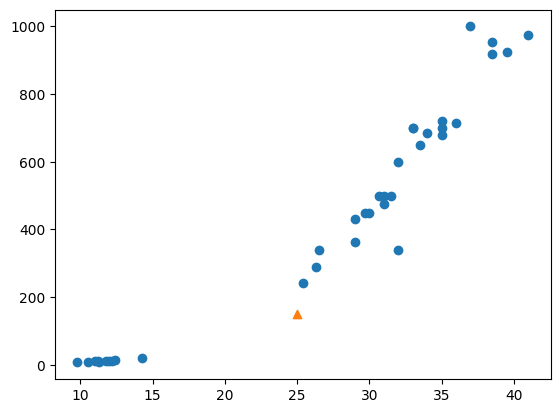

In [193]:
# 예측값 시각화
import matplotlib.pyplot as plt
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')
plt.show()
# 시각화 해보니 브림에 가까움.
# 왜지?

In [194]:
kn.kneighbors([[25,150]])
# 붉은 창은 데이터프레임으로 안줬다고 말해주는거임 상관 ㄴㄴ
# 결과를 보면 이웃이 11, 20, 13, 22, 15번 생선이라 말해주고
# 각 번호별 생선과의 거리를 알려줌.

C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.73859415, 137.17988191, 138.39320793,
         140.00603558]]),
 array([[11, 20, 13, 22, 15]]))

In [195]:
# 이웃 생선 시각화 해보기
distance, indexes = kn.kneighbors([[25, 150]])

C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [196]:
n_df = train_input.iloc[indexes[0]]
# iloc: 숫자를 이용하여 찾는 코드
# 이웃 생선 뽑아옴
# 결과값에 나오는 인덱스는 랜덤으로 부여됐던 인덱스임 신경 ㄴㄴ

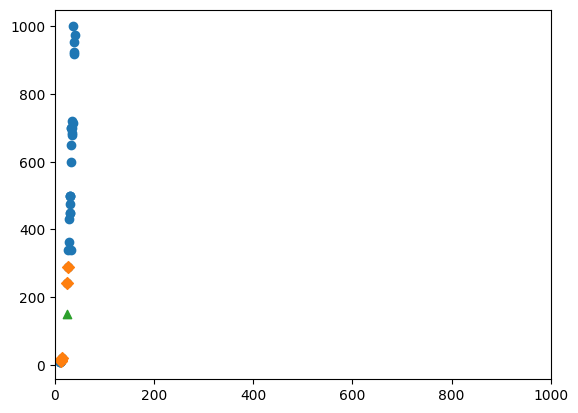

In [197]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(n_df['Length2'], n_df['Weight'], marker='D')
plt.scatter(25, 150, marker='^')
plt.xlim(0, 1000)
plt.show()
# x축을 y축과 동일하게 설정하여 확인해보기
# 확인해보니 x축은 영향이 없는 데이터들임
# y값에 영향을 받기 때문에 25, 150은 스멜트 보다 브림에 가까운 이웃을 둠.

- 표준점수로 확인
```
(데이터 - 평균) / 표준편차
```

In [198]:
# 평균과 표준편차 구하기
mean = train_input.mean()

In [199]:
std = train_input.std()

In [200]:
train_input.head()

,Length2,Weight
26,35.0,720.0
3,29.0,363.0
150,11.3,8.7
9,30.7,500.0
149,11.2,9.8


In [201]:
# train_input 은 데이터프레임 형식으로 2가지 컬럼이 있음
# 2가지 컬럼 모든 데이터에 평균을 빼주는 작업
(train_input - mean).head()

,Length2,Weight
26,8.066667,278.016667
3,2.066667,-78.983333
150,-15.633333,-433.283333
9,3.766667,58.016667
149,-15.733333,-432.183333


In [202]:
# 표준점수
train_scaled = ((train_input - mean) / std)

In [203]:
# 표준 점수를 기준으로 시각화하기
# [25, 150] 도 표준점수로 바꿔주기
new = ([25, 150] - mean) / std
new

Length2   -0.188902
Weight    -0.884177
dtype: float64

In [204]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [205]:
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [206]:
kn.predict([new])

C:\Users\2-22\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## 펭귄데이터 연습

In [207]:
import seaborn as sns

In [208]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [209]:
# 널값 확인
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [210]:
# 종 확인
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [211]:
# 평균들 확인
df.groupby('species')[['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']].mean()
# 확인 결과 species중 Adelie랑 Gentoo의 flipper_length_mm	body_mass_g 사용

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


In [212]:
# Adelie의 flipper_length_mm 의 널값 채우기
a1 = df['species'] == 'Adelie'
a1_mean = df.loc[a1, 'flipper_length_mm'].mean()
df.loc[a1, 'flipper_length_mm'] = df.loc[a1, 'flipper_length_mm'].fillna(a1_mean)

# Adelie의 body_mass_g 널값 채우기
a2_mean = df.loc[a1, 'body_mass_g'].mean()
df.loc[a1, 'body_mass_g'] = df.loc[a1, 'body_mass_g'].fillna(a2_mean)

# Gentoo의 flipper_length_mm 의 널값 채우기
c1 = df['species'] == 'Gentoo'
c1_mean = df.loc[c1, 'flipper_length_mm'].mean()
df.loc[c1, 'flipper_length_mm'] = df.loc[c1, 'flipper_length_mm'].fillna(c1_mean)

# Gentoo의 body_mass_g 널값 채우기
c2_mean = df.loc[c1, 'body_mass_g'].mean()
df.loc[c1, 'body_mass_g'] = df.loc[c1, 'body_mass_g'].fillna(c2_mean)

In [213]:
# Adelie랑 Gentoo 만 사용
cond = df['species'].isin(['Adelie', 'Gentoo'])
# flipper_length_mm	+ body_mass_g데이터만 사용
penguins_data = df.loc[cond, ['flipper_length_mm', 'body_mass_g']]
penguins_target = df.loc[cond, ['species']]

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
train_test_split(penguins_data, penguins_target)

[     flipper_length_mm  body_mass_g
 129              210.0       4000.0
 238              209.0       4800.0
 49               191.0       4150.0
 113              197.0       4275.0
 57               193.0       3800.0
 ..                 ...          ...
 269              215.0       5300.0
 220              211.0       4500.0
 132              193.0       3500.0
 336              217.0       4875.0
 104              193.0       2925.0
 
 [207 rows x 2 columns],
      flipper_length_mm  body_mass_g
 108              181.0       3175.0
 39               184.0       4650.0
 276              208.0       4300.0
 1                186.0       3800.0
 221              230.0       5700.0
 ..                 ...          ...
 234              210.0       4200.0
 22               189.0       3800.0
 66               195.0       3350.0
 227              219.0       5200.0
 340              215.0       4850.0
 
 [69 rows x 2 columns],
     species
 129  Adelie
 238  Gentoo
 49   Adelie
 113  A

In [216]:
train_input, test_input, train_target, test_target = train_test_split(penguins_data, penguins_target, stratify = penguins_target)

In [217]:
from sklearn.neighbors import KNeighborsClassifier

In [222]:
mean = train_input.mean()
std = train_input.std()
train_input.head()

,flipper_length_mm,body_mass_g
18,184.000000,3325.00000
331,229.000000,5950.00000
304,212.000000,4750.00000
306,218.000000,4600.00000
339,217.186992,5076.01626


In [218]:
kn = KNeighborsClassifier()

In [223]:
train_scaled = ((train_input - mean) / std)
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [225]:
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

0.9710144927536232

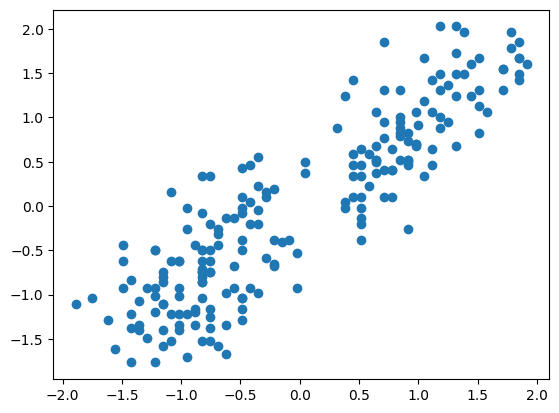

In [227]:
plt.scatter(train_scaled['flipper_length_mm'], train_scaled['body_mass_g'])
plt.show()

### 펭귄 연습문제 강사님 코드

In [229]:
import seaborn as sns

In [231]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [233]:
# 데이터 확인
df.info()
# 확인 결과 널값 빼도 문제없어서 제거하고 실행

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [235]:
# 널값 데이터 제거
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [236]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [238]:
# 숫자데이터만 활용하기
df.groupby('species').mean(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


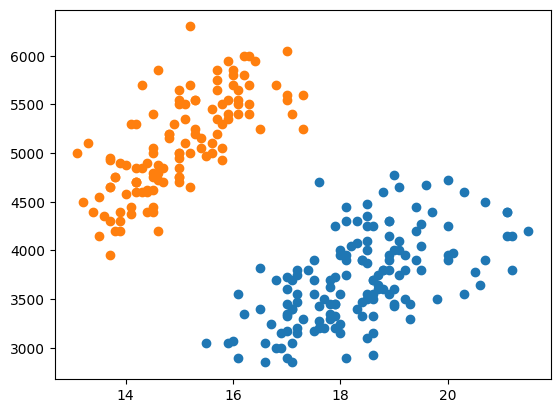

In [242]:
# 시각화 해보기
import matplotlib.pyplot as plt
cond_adel = df['species'] == 'Adelie'
cond_gent = df['species'] == 'Gentoo'
plt.scatter(df.loc[cond_adel, 'bill_depth_mm'], df.loc[cond_adel, 'body_mass_g'])
plt.scatter(df.loc[cond_gent, 'bill_depth_mm'], df.loc[cond_gent, 'body_mass_g'])
plt.show()

In [244]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
pg_data = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]
pg_data.head()

,bill_depth_mm,body_mass_g
0,18.7,3750.0
1,17.4,3800.0
2,18.0,3250.0
4,19.3,3450.0
5,20.6,3650.0


In [245]:
pg_target = df.loc[cond, ['species']]

In [246]:
# 학습 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

In [248]:
train_input, test_input, train_target, test_target = train_test_split(pg_data, pg_target, stratify=pg_target)

In [249]:
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [251]:
kn.score(test_input, test_target['species'])

0.9253731343283582

In [252]:
mean = train_input.mean()
std = train_input.std()
train_scaled = (train_input - mean) / std

In [253]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [254]:
test_scaled = (test_input - mean) / std

In [255]:
kn.score(test_scaled, test_target)

1.0